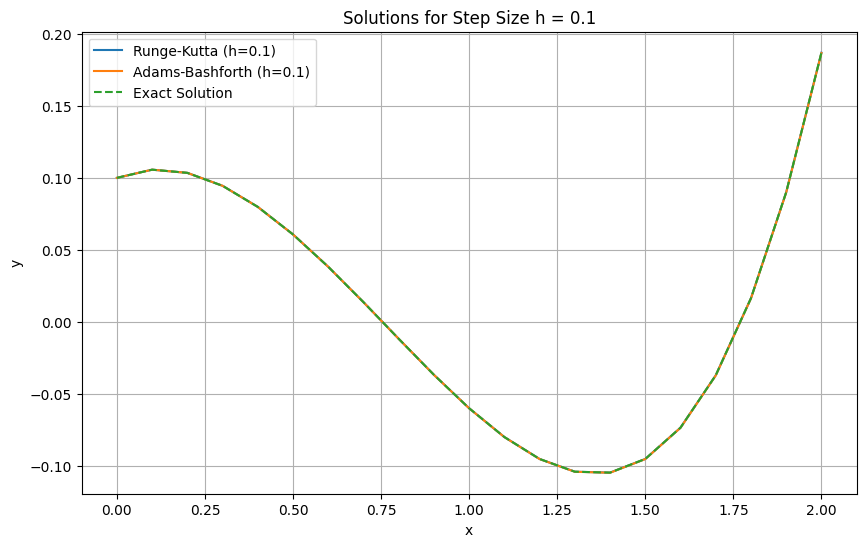

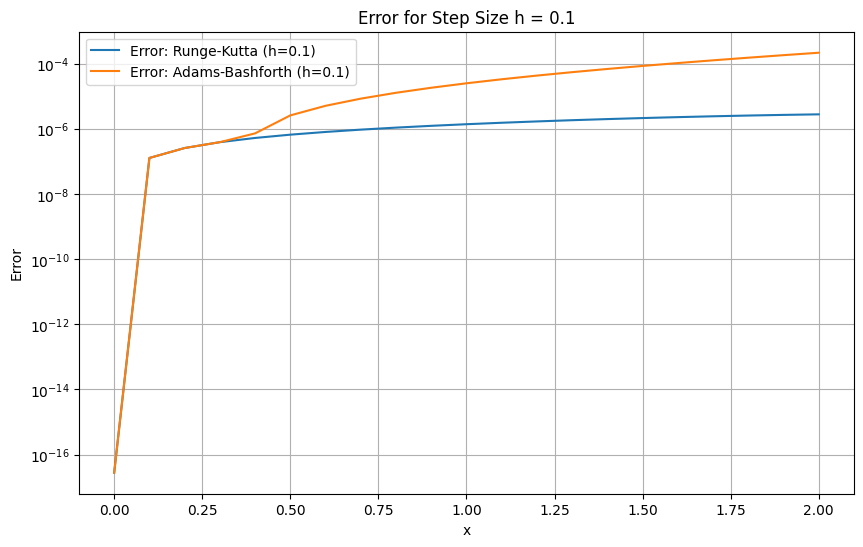

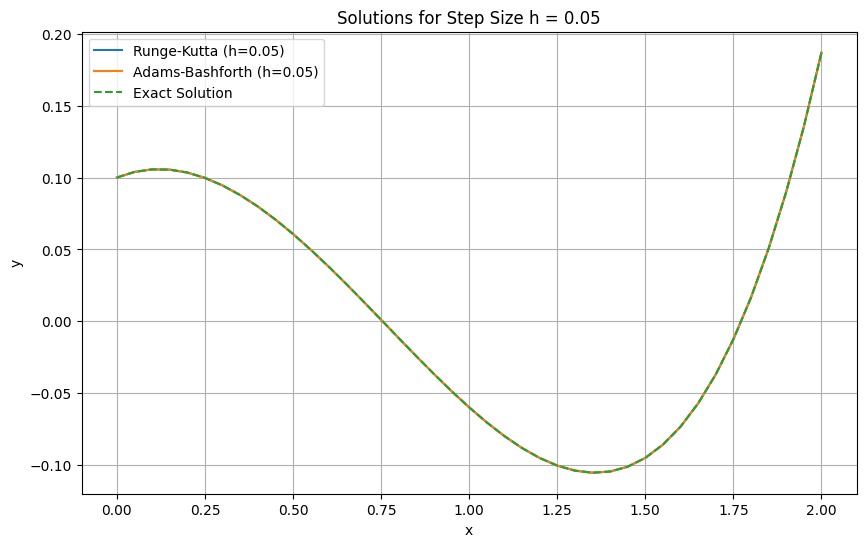

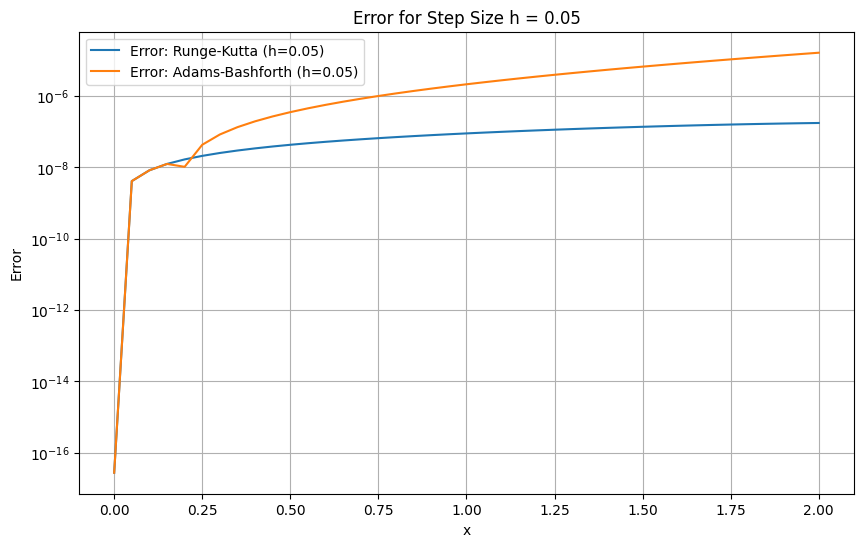

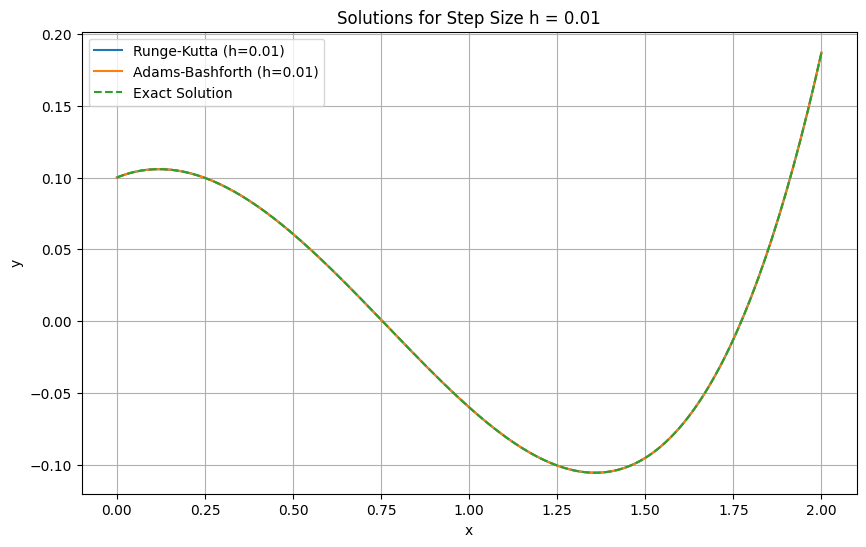

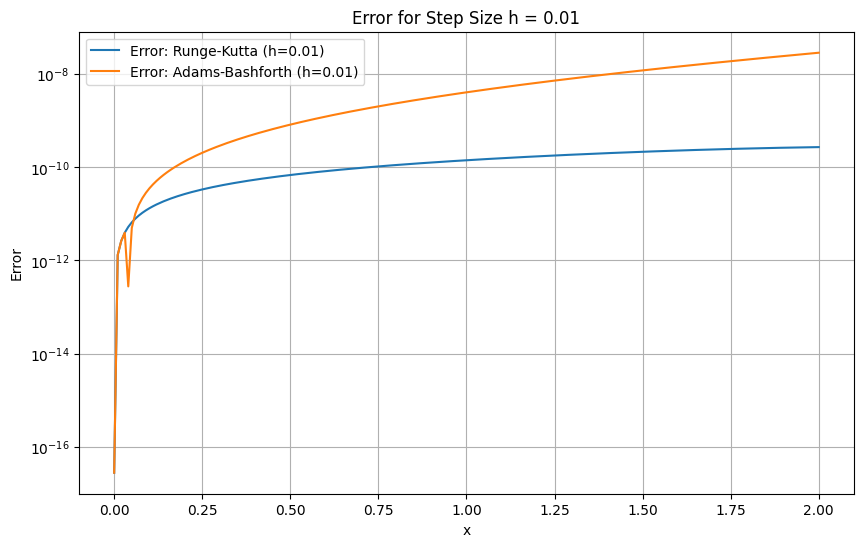

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Define the ODE
def f(x, y):
    return y + x**2 - 2*x + np.sin(x)

def exact_solution(x):
    return 0.6 * np.exp(x) - x**2 - 0.5 * (np.cos(x) + np.sin(x))

#4th-order Runge-Kutta method
def runge_kutta_4(f, x0, y0, x_end, h):
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros_like(x_values)
    y_values[0] = y0

    for i in range(1, len(x_values)):
        x = x_values[i - 1]
        y = y_values[i - 1]
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)
        y_values[i] = y + (k1 + 2*k2 + 2*k3 + k4) / 6

    return x_values, y_values

#Adams-Bashforth method (4th order)
def adams_bashforth_4(f, x0, y0, x_end, h):
    x_values, y_rk4 = runge_kutta_4(f, x0, y0, x0 + 3*h, h)  #RK4 to initialize
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros_like(x_values)
    y_values[:4] = y_rk4[:4]

    for i in range(3, len(x_values) - 1):
        x = x_values[i]
        y_values[i + 1] = y_values[i] + (h / 24) * (
            55 * f(x_values[i], y_values[i])
            - 59 * f(x_values[i - 1], y_values[i - 1])
            + 37 * f(x_values[i - 2], y_values[i - 2])
            - 9 * f(x_values[i - 3], y_values[i - 3])
        )

    return x_values, y_values

#Solve
x0, y0, x_end = 0, 0.1, 2
step_sizes = [0.1, 0.05, 0.01]
results = {}

for h in step_sizes:
    x_rk, y_rk = runge_kutta_4(f, x0, y0, x_end, h)
    x_ab, y_ab = adams_bashforth_4(f, x0, y0, x_end, h)
    exact_y = exact_solution(x_rk)
    results[h] = {
        "x_rk": x_rk,
        "y_rk": y_rk,
        "x_ab": x_ab,
        "y_ab": y_ab,
        "exact": exact_y,
        "error_rk": np.abs(y_rk - exact_y),
        "error_ab": np.abs(y_ab - exact_y[:len(y_ab)])
    }

#Plot
for h, data in results.items():
    plt.figure(figsize=(10, 6))
    plt.plot(data["x_rk"], data["y_rk"], label="Runge-Kutta (h={})".format(h))
    plt.plot(data["x_ab"], data["y_ab"], label="Adams-Bashforth (h={})".format(h))
    plt.plot(data["x_rk"], data["exact"], label="Exact Solution", linestyle="dashed")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Solutions for Step Size h = {}".format(h))
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(data["x_rk"], data["error_rk"], label="Error: Runge-Kutta (h={})".format(h))
    plt.plot(data["x_ab"], data["error_ab"], label="Error: Adams-Bashforth (h={})".format(h))
    plt.xlabel("x")
    plt.ylabel("Error")
    plt.title("Error for Step Size h = {}".format(h))
    plt.yscale("log")
    plt.legend()
    plt.grid()
    plt.show()